# Notebook to test JEC quadratures

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
os.getcwd()

'/sps/lsstcest/users/campagne/jax_cosmo_forked/docs/notebooks'

In [3]:
os.chdir("../../")
os.getcwd()

'/sps/lsstcest/users/campagne/jax_cosmo_forked'

In [4]:
%pylab inline
import os
os.environ['JAX_ENABLE_X64']='True'
import jax
from jax_cosmo import Cosmology, background

Populating the interactive namespace from numpy and matplotlib


In [5]:
# We first define jax_cosmo cosmologies

cosmo_jax = Cosmology(Omega_c=0.3, Omega_b=0.05, h=0.7, sigma8 = 0.8, n_s=0.96,
                      Omega_k=0., w0=-1., wa=0.)

## Comparing angular cl

In [6]:
from jax_cosmo.redshift import smail_nz

# Let's define a redshift distribution
# with a Smail distribution with a=1, b=2, z0=1
nz = smail_nz(1.,2., 1.)

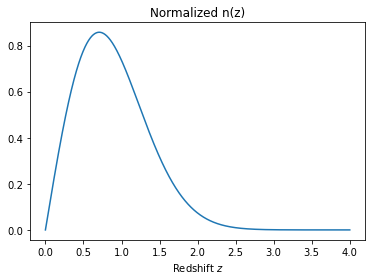

In [7]:
z = linspace(0,4,1024)
plot(z, nz(z))
xlabel(r'Redshift $z$');
title('Normalized n(z)');

In [8]:
from jax_cosmo.angular_cl import angular_cl
from jax_cosmo import probes

In [9]:
# Let's first compute some Weak Lensing cls
tracer_jax = probes.WeakLensing([nz])
ell = np.logspace(0.1,3)

In [10]:
cl_jax = angular_cl(cosmo_jax, ell, [tracer_jax])

In [11]:
from jax_cosmo.scipy.integrate import TrapezoidalQuad,ClenshawCurtisQuad

In [12]:
from jax_cosmo.angular_cl import jec_angular_cl

In [13]:
# use default simpson integration
jec_cl_jax1= jec_angular_cl(cosmo_jax, ell, [tracer_jax])

In [14]:
# use user Clenshaw-Curtis quadrature integration
jec_cl_jax2= jec_angular_cl(cosmo_jax, ell, [tracer_jax], quadInt=ClenshawCurtisQuad(50))

In [15]:
#jec_cl_jax3= jec_angular_cl(cosmo_jax, ell, [tracer_jax], quadInt=ClenshawCurtisQuad(25))

In [16]:
#jec_cl_jax4= jec_angular_cl(cosmo_jax, ell, [tracer_jax], quadInt=ClenshawCurtisQuad(10))

In [17]:
jec_cl_jax5= jec_angular_cl(cosmo_jax, ell, [tracer_jax], quadInt=ClenshawCurtisQuad(5))

In [18]:
jec_cl_jax6= jec_angular_cl(cosmo_jax, ell, [tracer_jax], quadInt=ClenshawCurtisQuad(3))

In [19]:
# use user Trapezoidale quadrature integration

In [20]:
jec_cl_jax7= jec_angular_cl(cosmo_jax, ell, [tracer_jax], quadInt=TrapezoidalQuad(5))

Text(0, 0.5, 'Lensing angular $C_\\ell$')

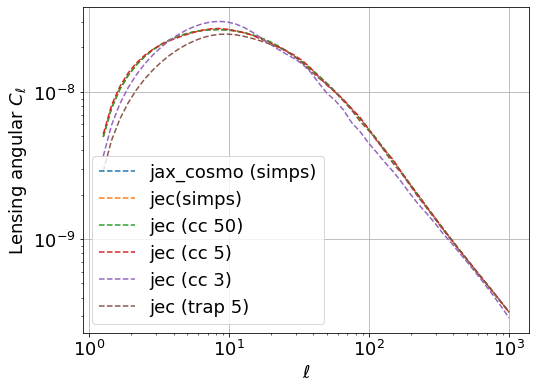

In [21]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 18
mpl.rcParams["font.family"] = "Times New Roman"

figure(figsize=(8, 6))
loglog(ell, cl_jax[0], '--', label='jax_cosmo (simps)')
loglog(ell, jec_cl_jax1[0], '--', label='jec(simps)')
loglog(ell, jec_cl_jax2[0], '--', label='jec (cc 50)')
#loglog(ell, jec_cl_jax3[0], '--', label='jec (cc 25)')
#loglog(ell, jec_cl_jax4[0], '--', label='jec (cc 10)')
loglog(ell, jec_cl_jax5[0], '--', label='jec (cc 5)')
loglog(ell, jec_cl_jax6[0], '--', label='jec (cc 3)')
loglog(ell, jec_cl_jax7[0], '--', label='jec (trap 5)')
grid()
legend()
xlabel(r'$\ell$')
ylabel(r'Lensing angular $C_\ell$')

In [92]:
%timeit jec_angular_cl(cosmo_jax, ell, [tracer_jax])

6.92 s ± 282 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [93]:
%timeit angular_cl(cosmo_jax, ell, [tracer_jax])

7.03 s ± 507 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [94]:
%timeit jec_angular_cl(cosmo_jax, ell, [tracer_jax], quadInt=ClenshawCurtisQuad(5))

5.7 s ± 471 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [106]:
%timeit jec_angular_cl(cosmo_jax, ell, [tracer_jax], quadInt=ClenshawCurtisQuad(50))

6.05 s ± 444 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
